<h1>Tutorials for building sign language model</h1>

<h2>install packages</h2>

In [1]:
pip install opencv-python tensorflow==2.15.0 tensorflow_decision_forests tensorflowjs numpy scikit-learn

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.16.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tf_keras-2.15.1-py3-none-any.whl.metadata (1.7 kB)


INFO: pip is looking at multiple versions of tensorstore to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorstore-0.1.63-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached tensorstore-0.1.62-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached tensorstore-0.1.61-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached tensorstore-0.1.60-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached orbax_checkpoint-0.6.0-py3-none-any.whl.metadata (1.8 kB)
INFO: pip is still looking at multiple versions of tensorstore to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorstore-0.1.59-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached tensorstore-0.1.58-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached tensorstore-0.1.57-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
INFO: This is taking lo

Using cached orbax_checkpoint-0.4.4-py3-none-any.whl (123 kB)
  Attempting uninstall: tensorstore
    Found existing installation: tensorstore 0.1.64
    Uninstalling tensorstore-0.1.64:
      Successfully uninstalled tensorstore-0.1.64
  Attempting uninstall: orbax-checkpoint
    Found existing installation: orbax-checkpoint 0.6.0
    Uninstalling orbax-checkpoint-0.6.0:
      Successfully uninstalled orbax-checkpoint-0.6.0
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
      Successfully uninstalled tf_keras-2.17.0
Note: you may need to restart the kernel to use updated packages.


<h2>Load and Preprocess the Data in Python</h2>

In [1]:
import os
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

data_dir = "./asl_dataset"
labels = []
images = []

# print(os.listdir(data_dir))
for label in os.listdir(data_dir):
    if label == ".DS_Store":
        continue
    label_dir = os.path.join(data_dir, label)
#     print(os.listdir(label_dir))
    for img_name in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (400, 400)) 
        img = img.astype('float32') / 255.0
        images.append(img)
        labels.append(label)
        
label_map = {label: idx for idx, label in enumerate(np.unique(labels))}

# print(labels)

# Convert labels to their corresponding integer values
labels = np.array([label_map[label] for label in labels])


labels = to_categorical(labels)

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print("images converted")

images converted


<h2>Validate</h2>

In [2]:
import numpy as np

# Convert lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)


# Now you can check the shapes
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Train images shape: (2012, 400, 400, 3)
Train labels shape: (2012, 36)
Validation images shape: (503, 400, 400, 3)
Validation labels shape: (503, 36)


<h2>Create CNN model</h2>

In [8]:
from tensorflow.keras import layers, models

def create_cnn_model():
    model = models.Sequential()

    # Directly specify the input shape in the first Conv2D layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)))
    
    # Add the rest of the layers
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(36, activation='softmax'))  # Assuming 36 classes

    return model

# Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Save the entire model (architecture + weights) using the recommended format
print("model is trained")

Epoch 1/10
63/63 [==============================] - 199s 3s/step - loss: 1.2898 - accuracy: 0.6571 - val_loss: 0.5507 - val_accuracy: 0.8668
Epoch 2/10
63/63 [==============================] - 181s 3s/step - loss: 0.1504 - accuracy: 0.9543 - val_loss: 0.3019 - val_accuracy: 0.9245
Epoch 3/10
63/63 [==============================] - 171s 3s/step - loss: 0.0408 - accuracy: 0.9896 - val_loss: 0.2426 - val_accuracy: 0.9483
Epoch 4/10
63/63 [==============================] - 166s 3s/step - loss: 0.0135 - accuracy: 0.9970 - val_loss: 0.2610 - val_accuracy: 0.9463
Epoch 5/10
63/63 [==============================] - 163s 3s/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.2669 - val_accuracy: 0.9523
Epoch 6/10
63/63 [==============================] - 173s 3s/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.3163 - val_accuracy: 0.9563
Epoch 7/10
63/63 [==============================] - 172s 3s/step - loss: 0.0296 - accuracy: 0.9925 - val_loss: 0.4426 - val_accuracy: 0.9284
Epoch 8/10
63

<h2>Save model</h2>

In [14]:
model.save('full_asl_recognition_model.h5')

print("model saved")


model saved


In [15]:

reverse_label_map = {value: key for key, value in label_map.items()}

<h2>Test model</h2>

1/1 [==============================] - 0s 141ms/step
True label: s, Predicted label: s


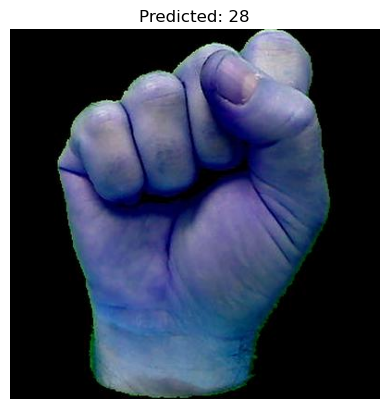

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('full_asl_recognition_model.h5')

# Function to plot the image and the model's prediction
def plot_prediction(image, prediction):
    plt.imshow(image)
    plt.title(f"Predicted: {prediction}")
    plt.axis('off')
    plt.show()

# Test the model on a validation image
test_image = val_images[2]  # Pick the first image from the validation set
test_label = val_labels[2]  # Corresponding true label

# Model prediction
prediction = loaded_model.predict(np.expand_dims(test_image, axis=0))

# Decode the one-hot encoded label to get the actual class
predicted_class = np.argmax(prediction, axis=1)[0]
true_class = np.argmax(test_label)

# print(reverse_label_map)

# Print and plot results
print(f"True label: {reverse_label_map[true_class]}, Predicted label: {reverse_label_map[predicted_class]}")

plot_prediction(test_image, predicted_class)

# print(label_map)


<h2>Convert to tenserflow model</h2>

In [12]:

import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

# Load the model
model = load_model('full_asl_recognition_model.h5')  # or '.h5'

# Convert the model to TensorFlow.js format
tfjs.converters.save_keras_model(model, './model')
print("model converted")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model converted
